**CREATE DATABASE pizzahut;** → Creates a new database named pizzahut.

**SHOW DATABASES;** → Lists all available databases in the system.

**SELECT DATABASE();** → Displays the currently selected database.

**USE pizzahut;** → Switches to the pizzahut database for further operations.

**SELECT DATABASE();** → Confirms the active database after switching.

# **Problem Explanation:**

MySQL Workbench may fail to correctly interpret and import CSV files if the date and time formats in the CSV don't match MySQL’s expected format (e.g., YYYY-MM-DD for DATE and HH:MM:SS for TIME).

**To overcome this, you need to:**

Create a table with a proper structure that matches the data types.

Preprocess or transform the date/time format to match MySQL's expectations during the import process.



```
create table orders (
order_id int not null,
order_date date not null,
order_time time not null,
primary key(order_id));

```





```
create table order_details (
order_details_id int not null,
order_id int not null,
Pizza_id text not null,
quantity int not null,
primary key(order_details_id));
```



# **comments**

**Pressing Ctrl + / (or Cmd + / on Mac) turns the selected code into a comment or removes the comment. It's a shortcut to quickly add or remove comments in your code.**


# **Retrieve the total number of orders placed.**



```
select count(order_id) as total_orders from orders;
```



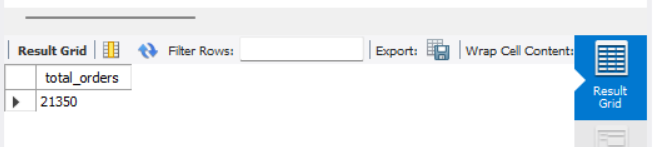

# **Note:**

pressing Ctrl + B beautifies or formats the SQL query, making it easier to read by automatically adding proper indentation and line breaks to your code. This is especially helpful for improving the readability of complex queries.

# **Calculate the total revenue generated from pizza sales.**

To calculate the revenue because the quantity of items ordered is stored in the order_details table, and the price for each pizza is stored in the pizzas table.

By joining these two tables on the pizza_id (which is the common key between them), you can access both the quantity from order_details and the price from pizzas, and then calculate the total revenue.



```
SELECT round(sum(order_details.quantity * pizzas.price), 2) as total_sales
FROM order_details
JOIN pizzas ON pizzas.pizza_id = order_details.pizza_id;

```



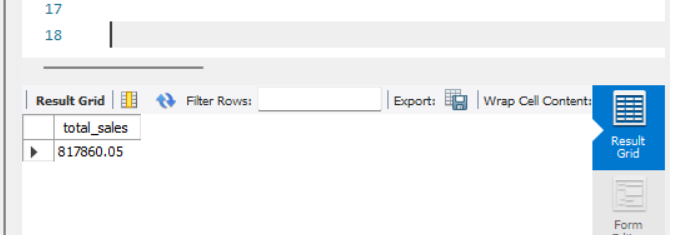

# **Identify the highest-priced pizza.**

# **Explanation:**

Joins the pizza_types and pizzas tables using the common column pizza_type_id.

Selects the pizza name (pizza_types.name) and price (pizzas.price).

Orders results by price in descending order so the most expensive pizza appears first.

Limits the output to 1 row to get only the highest-priced pizza.

# **Output:**

From the result grid, we see:

Pizza Name: "The Greek Pizza" ->pizza_types

Price: 35.95 ----->pirce

so we have to join and find highest price pizza



```
SELECT pizza_types.name, pizzas.price
FROM pizza_types
JOIN pizzas
ON pizza_types.pizza_type_id = pizzas.pizza_type_id
ORDER BY pizzas.price DESC
LIMIT 1;
```



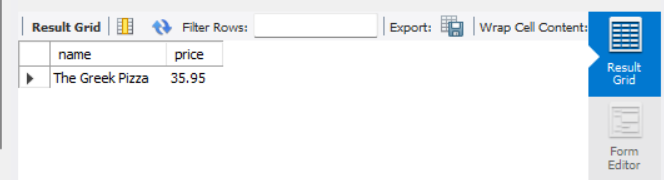

# **Identify the most common pizza size ordered.**

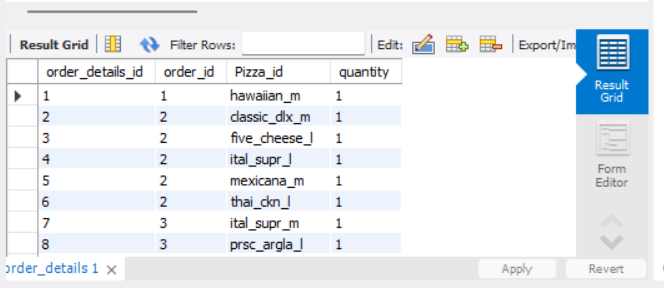

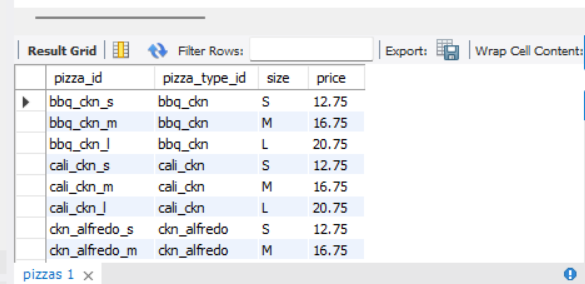



```
SELECT
    pizzas.size,
    COUNT(order_details.order_details_id) AS order_count
FROM
    pizzas
JOIN
    order_details ON pizzas.pizza_id = order_details.pizza_id
GROUP BY
    pizzas.size
ORDER BY
    order_count DESC;

```



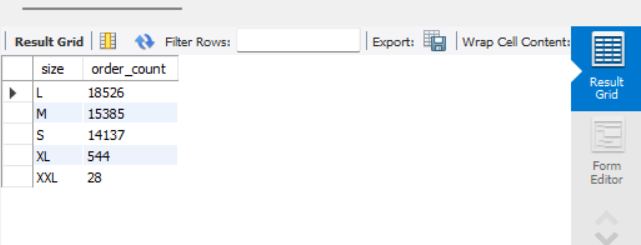

# **List the top 5 most ordered pizza types along with their quantities.**

SELECT pizza_types.name, SUM(order_details.quantity) AS quantity
→ Retrieves the pizza name and the total number of times it has been ordered.


FROM pizza_types
→ Starts from the pizza_types table, which contains pizza names.


JOIN pizzas ON pizza_types.pizza_type_id = pizzas.pizza_type_id
→ Joins the pizzas table to get pizza details.


JOIN order_details ON order_details.pizza_id = pizzas.pizza_id
→ Joins the order_details table to count orders for each pizza.


GROUP BY pizza_types.name
→ Groups results by pizza name to calculate total quantities.


ORDER BY quantity DESC
→ Sorts in descending order to get the most popular pizzas first.


LIMIT 5
→ Limits the result to the top 5 most ordered pizzas

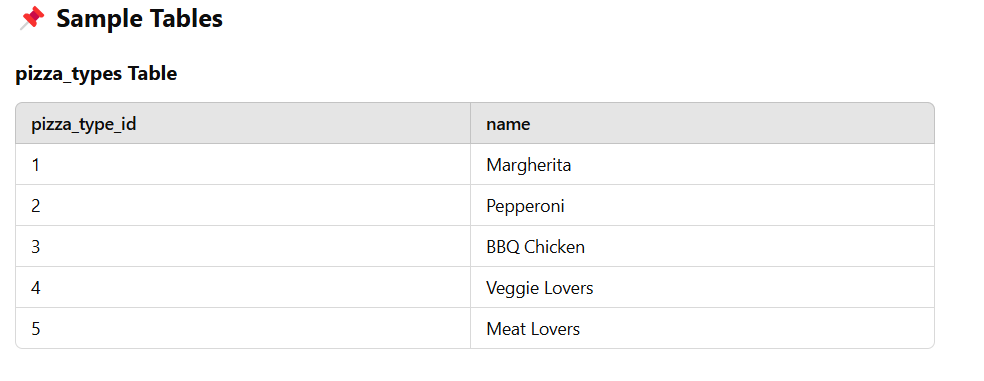

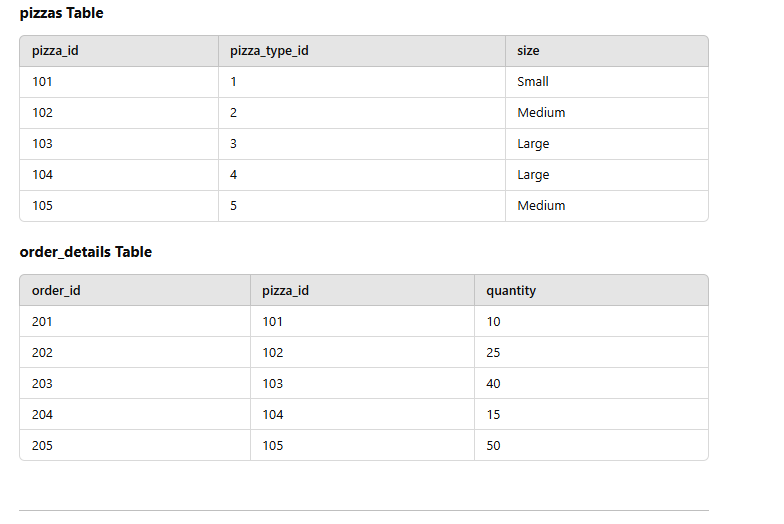

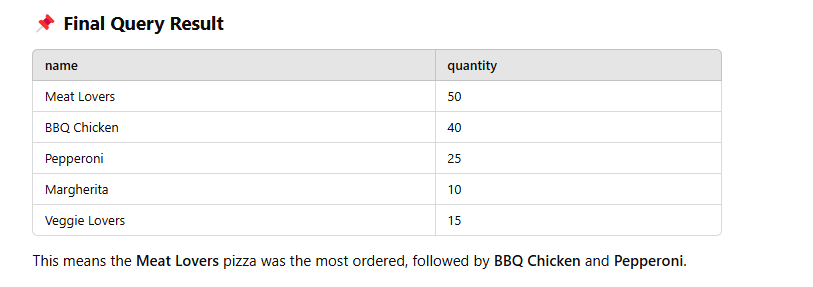



```
SELECT pizza_types.name,
       SUM(order_details.quantity) AS quantity
FROM pizza_types
JOIN pizzas
    ON pizza_types.pizza_type_id = pizzas.pizza_type_id
JOIN order_details
    ON order_details.pizza_id = pizzas.pizza_id
GROUP BY pizza_types.name
ORDER BY quantity DESC
LIMIT 5;

```



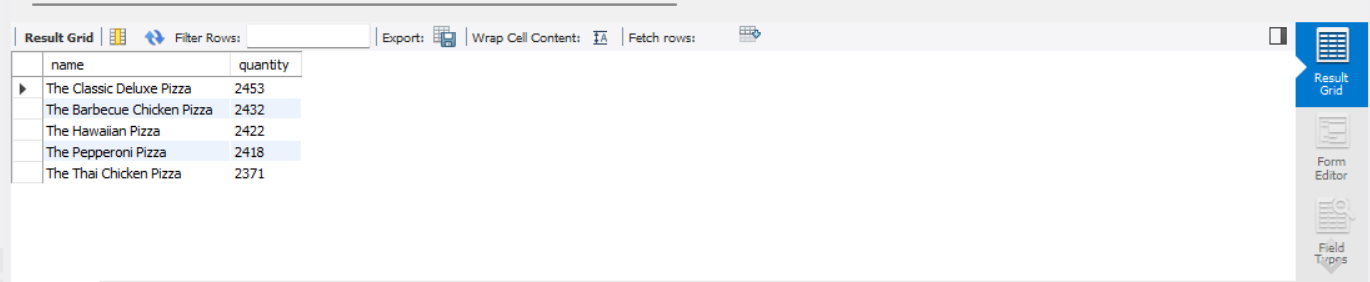

# ✅ **Key Takeaways**
Joins multiple tables (pizza_types, pizzas, order_details) to get useful insights.

Aggregates order quantities using SUM(order_details.quantity).

Groups by pizza type to count total pizzas sold.

Sorts results in descending order (ORDER BY quantity DESC) to show the most popular pizzas first.

Limits output to the top 5 pizzas.



# **Join the necessary tables to find the total quantity of each pizza category ordered.**

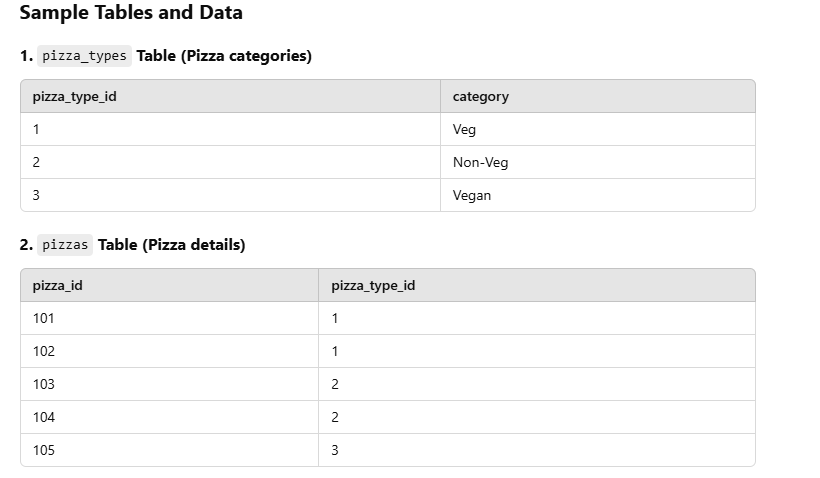

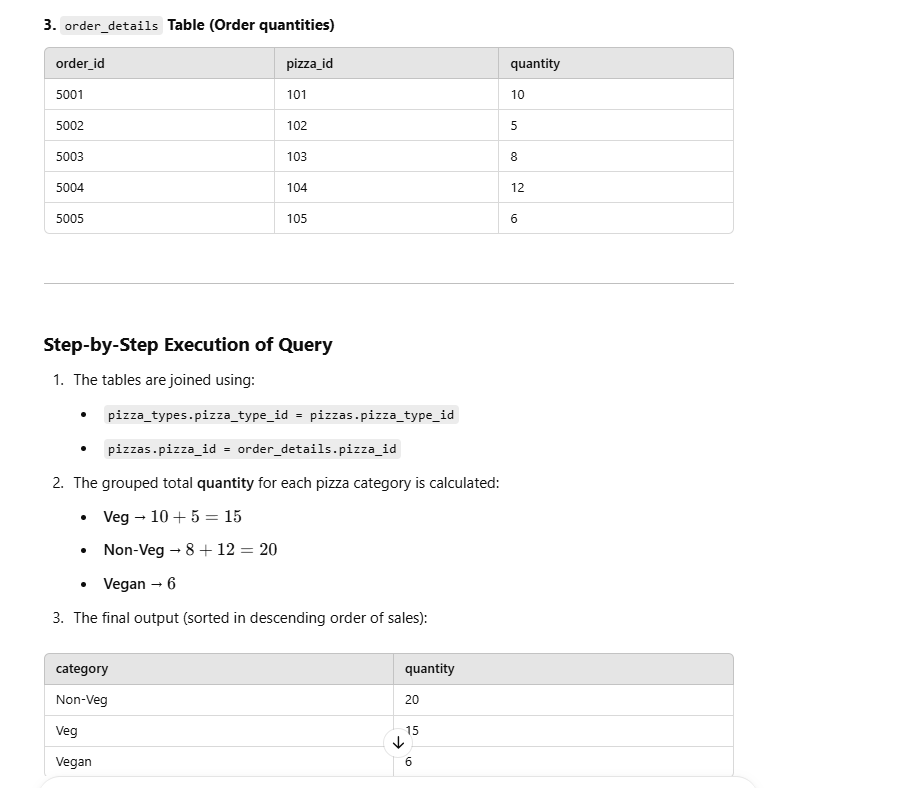



```
SELECT pizza_types.category,
       SUM(order_details.quantity) AS quantity
FROM pizza_types
JOIN pizzas
    ON pizza_types.pizza_type_id = pizzas.pizza_type_id
JOIN order_details
    ON order_details.pizza_id = pizzas.pizza_id
GROUP BY pizza_types.category
ORDER BY quantity DESC;

```



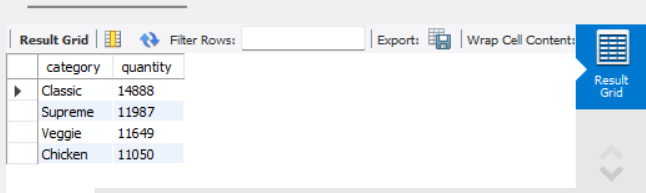

# **Determine the distribution of orders by hour of the day.**

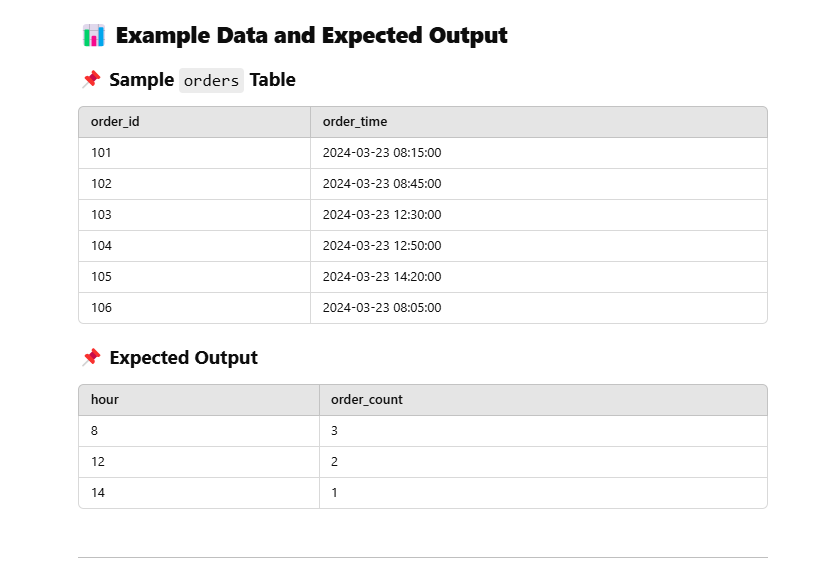



```
SELECT HOUR(order_time) AS hour,
       COUNT(order_id) AS order_count
FROM orders
GROUP BY HOUR(order_time);

```



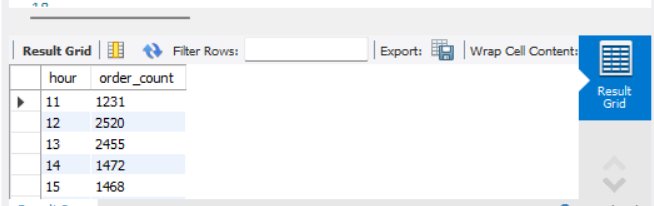

# **Join relevant tables to find the category-wise distribution of pizzas.**

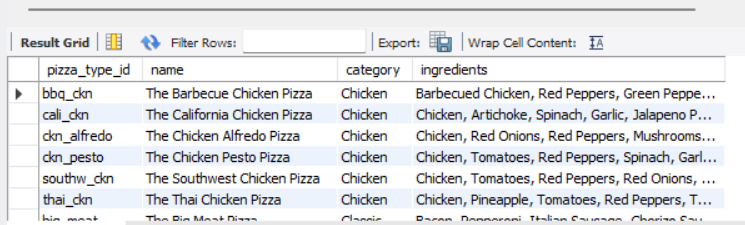



```
select category, count(name) from pizza_types
group by category;
```



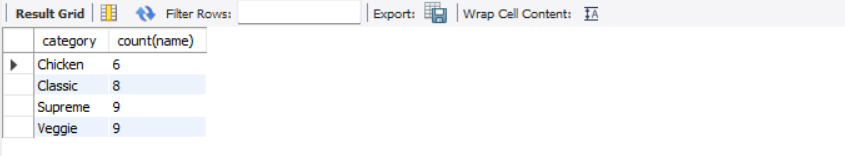

# **Group the orders by date and calculate the average number of pizzas ordered per day.**

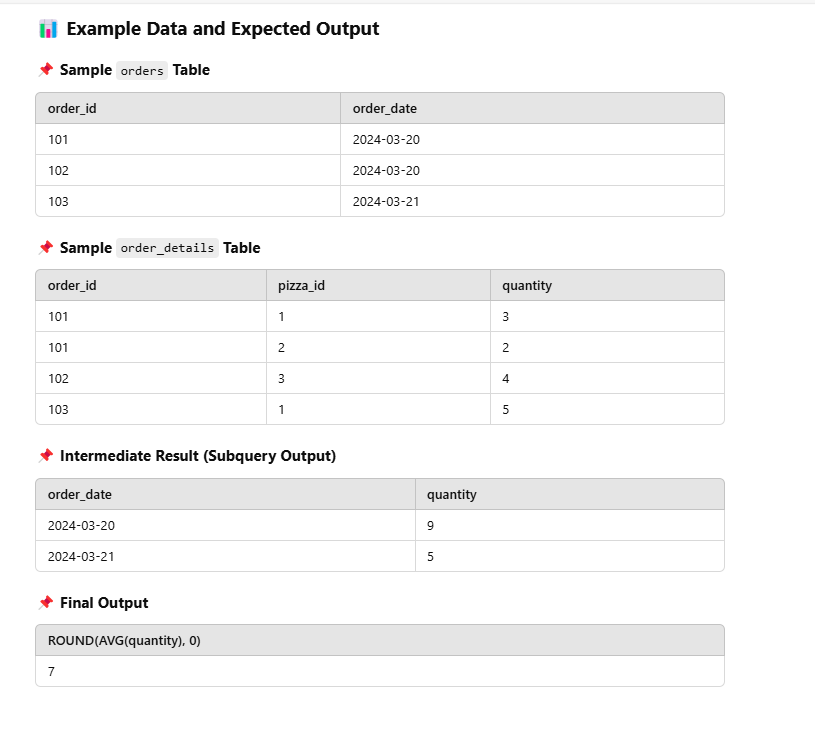



```
ELECT ROUND(AVG(quantity), 0) as avg_pizza_order_day
FROM (
    SELECT orders.order_date, SUM(order_details.quantity) AS quantity
    FROM orders
    JOIN order_details
    ON orders.order_id = order_details.order_id
    GROUP BY orders.order_date
) AS order_quantity;

```



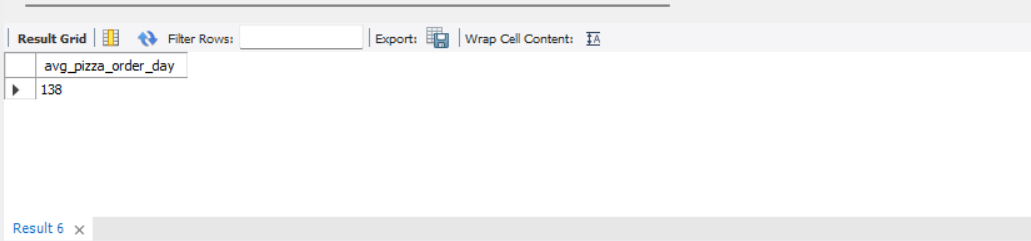

# **Determine the top 3 most ordered pizza types based on revenue.**

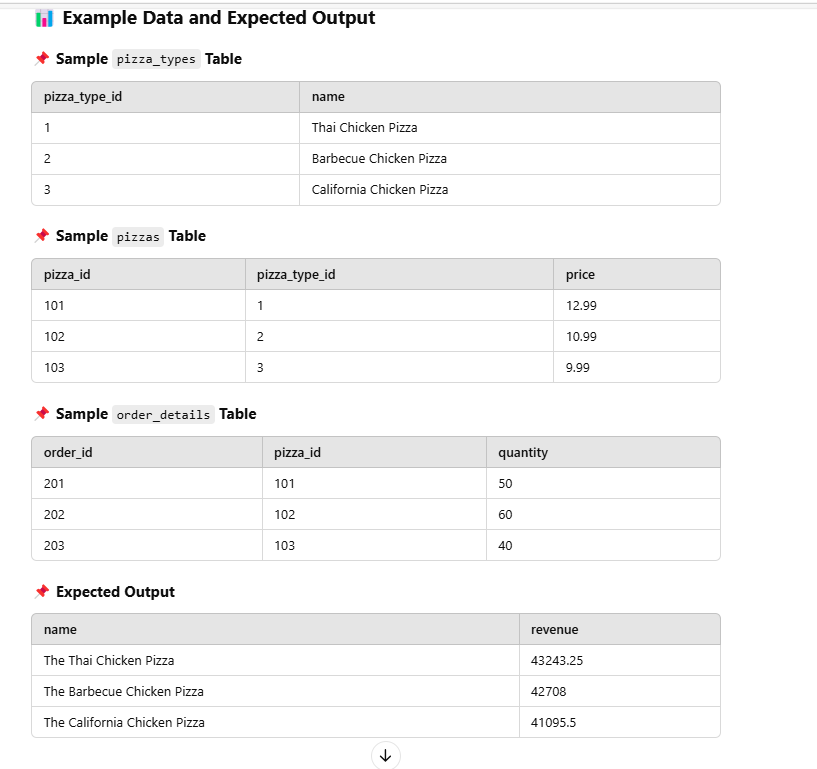



```
SELECT pizza_types.name,
       SUM(order_details.quantity * pizzas.price) AS revenue
FROM pizza_types
JOIN pizzas
    ON pizzas.pizza_type_id = pizza_types.pizza_type_id
JOIN order_details
    ON order_details.pizza_id = pizzas.pizza_id
GROUP BY pizza_types.name
ORDER BY revenue DESC
LIMIT 3;

```



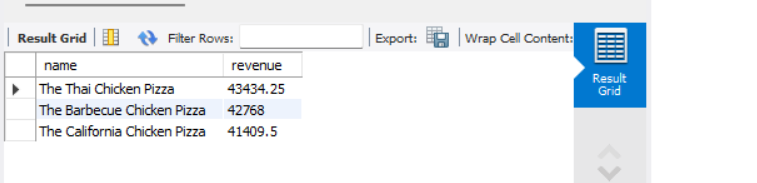

# **✅ Key Takeaways**

Finds top 3 best-selling pizza types based on revenue.

Uses SUM() to calculate total revenue.

Orders results in descending order to get highest revenue pizzas.

Efficient for business insights like popular pizzas and sales performance.

## **Calculate the percentage contribution of each pizza type to total revenue.**

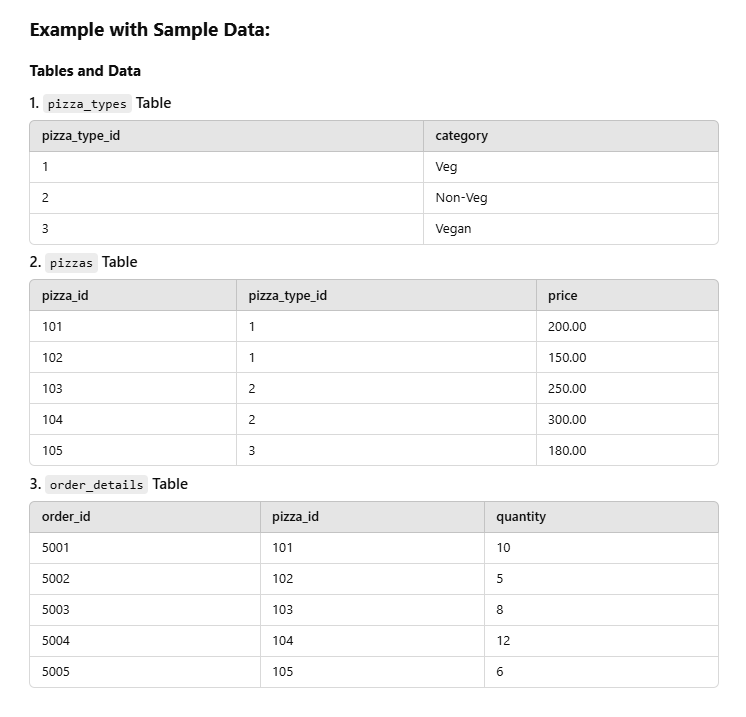

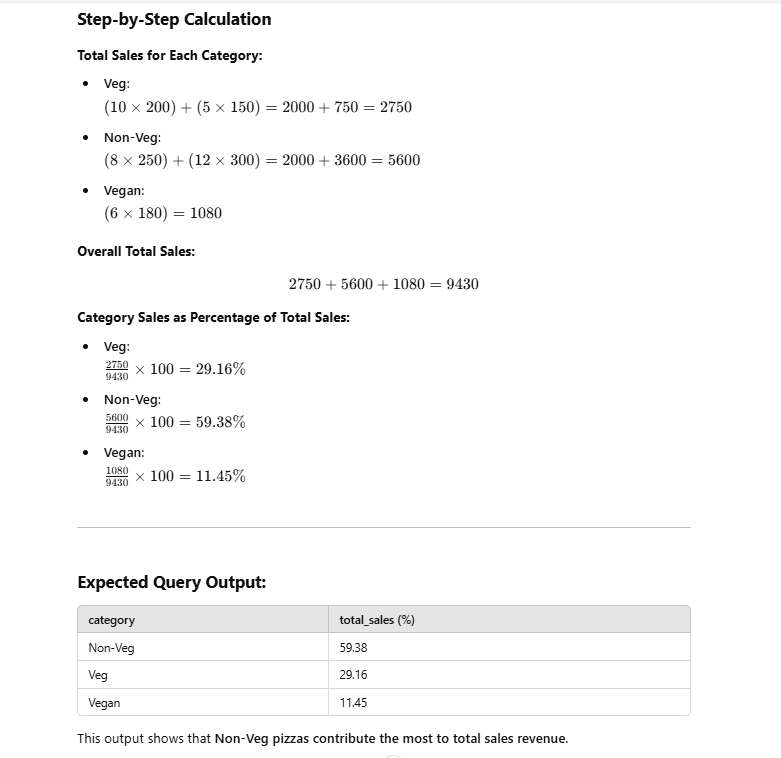



```
SELECT pizza_types.category,
       ROUND(SUM(order_details.quantity * pizzas.price) /
       (SELECT SUM(order_details.quantity * pizzas.price)
        FROM order_details
        JOIN pizzas ON pizzas.pizza_id = order_details.pizza_id) * 100, 2) AS total_sales
FROM pizza_types
JOIN pizzas ON pizza_types.pizza_type_id = pizzas.pizza_type_id
JOIN order_details ON order_details.pizza_id = pizzas.pizza_id
GROUP BY pizza_types.category
ORDER BY total_sales DESC;

```



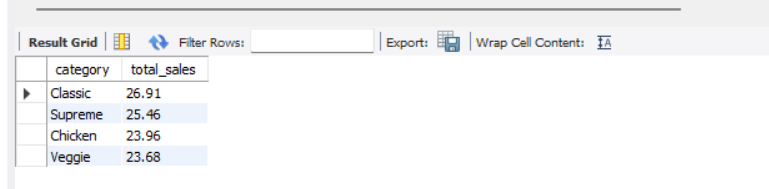

# **Analyze the cumulative revenue generated over time.**

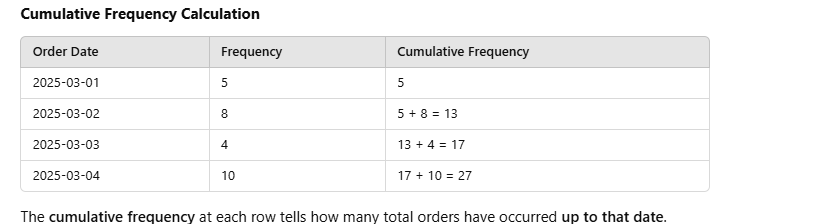

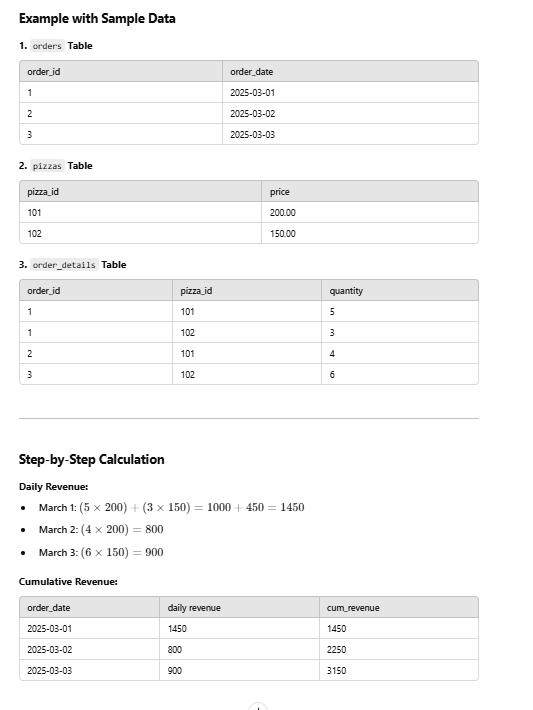



```
WITH sales AS (
    SELECT orders.order_date,
           SUM(order_details.quantity * pizzas.price) AS revenue
    FROM order_details
    JOIN pizzas ON order_details.pizza_id = pizzas.pizza_id
    JOIN orders ON orders.order_id = order_details.order_id
    GROUP BY orders.order_date
)
SELECT order_date,
       SUM(revenue) OVER (ORDER BY order_date) AS cum_revenue
FROM sales;

```



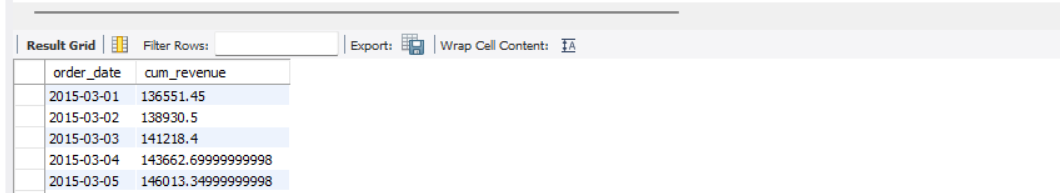

# **Determine the top 3 most ordered pizza types based on revenue for each pizza category.**

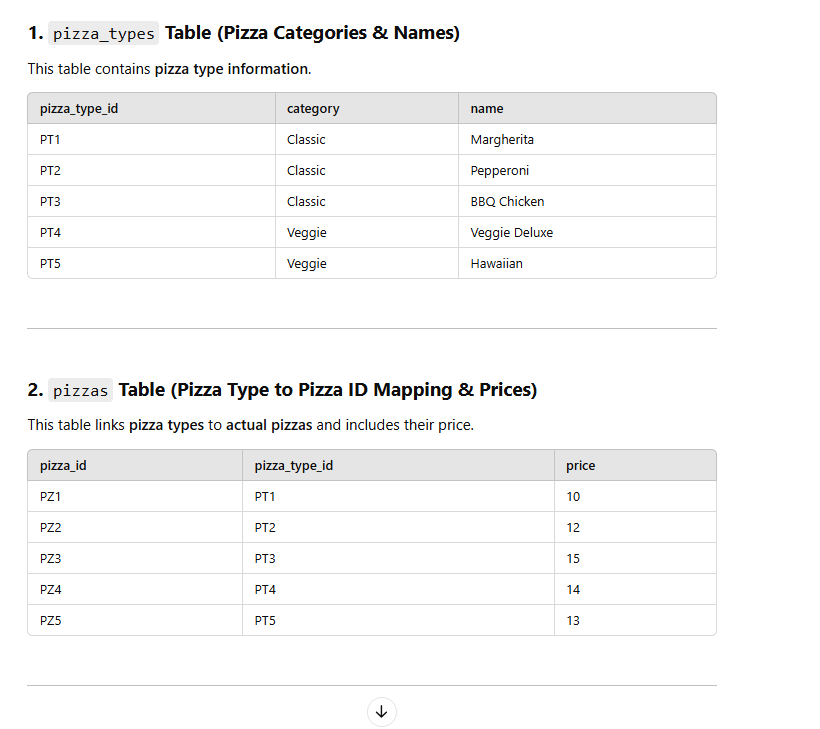

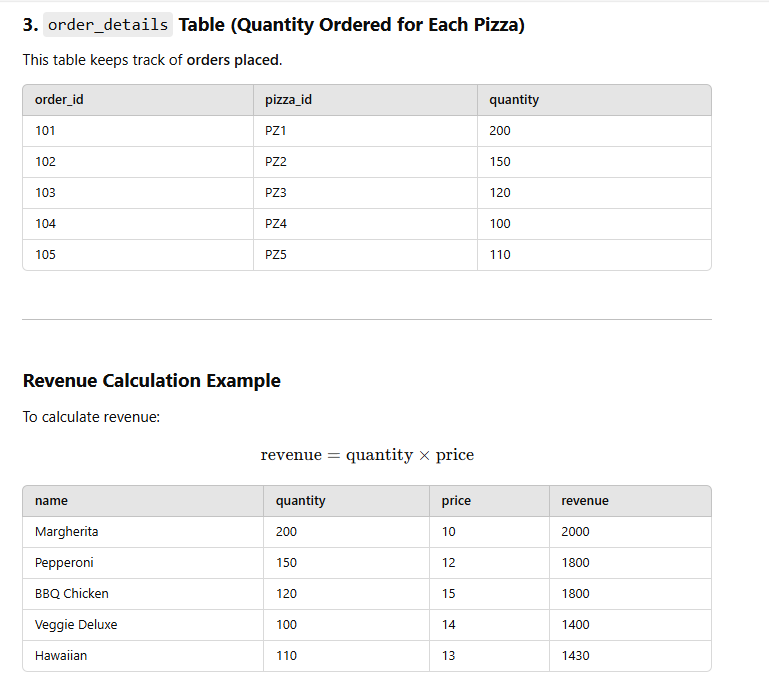

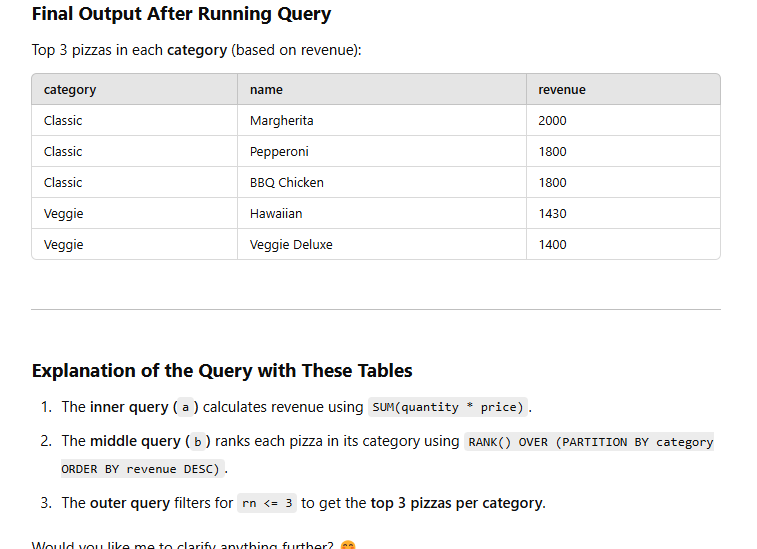



```

SELECT name, revenue
FROM (
    SELECT category, name, revenue,
           RANK() OVER (PARTITION BY category ORDER BY revenue DESC) AS rn
    FROM (
        SELECT pizza_types.category, pizza_types.name,
               SUM(order_details.quantity * pizzas.price) AS revenue
        FROM pizza_types
        JOIN pizzas ON pizza_types.pizza_type_id = pizzas.pizza_type_id
        JOIN order_details ON order_details.pizza_id = pizzas.pizza_id
        GROUP BY pizza_types.category, pizza_types.name
    ) AS a
) AS b
WHERE rn <= 3;

```



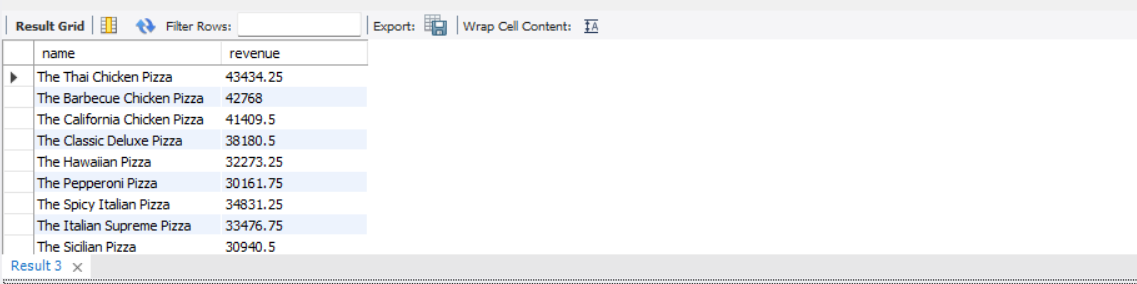

# **Summary**

# **Pizza Sales Analysis:**

**This project analyzes pizza sales data using SQL to identify top-selling pizzas, revenue trends, and customer preferences. The dataset includes orders, order_details, pizzas, and pizza_types, providing insights into sales performance.**

**Key analyses include identifying the top 3 pizzas per category based on revenue, determining the most ordered pizzas by quantity, and evaluating daily sales trends. Additionally, assessing pizza category profitability helps optimize the menu and marketing strategies.**

**Findings suggest focusing on high-revenue pizzas, aligning inventory with demand, offering promotions on slow sales days, and introducing seasonal variations. This SQL-driven approach enables data-driven decisions to boost sales and improve business efficiency.**

